## code: create plots

by: Allie

**Purpose** 

Create plots for change across time, and hourly trends by hour and site. Assumes "full_hourly_smaller.csv" file in current working directory, and folder "plots\" exists in current working directory for saving plots.

**Step 1:** create variables that will be used throughout the data

In [2]:
library(tidyverse)

# The list of contaminants within the data to be examined
contaminants = c("CO","NO","NO2","PM2.5","PM10","SO2")

# Dictionary with contaminant types as the key and their corresponding units as the value
unit_dict = c("CO"="mg/m3","NO"="µg/m3","NO2"="µg/m3",
              "PM2.5"="µg/m3","PM10"="µg/m3","SO2"="µg/m3")

# The folder to save the plots
plot_folder = "plots\\"

**Step 2:** load the data generated by "1-fix_Data.ipynb"

In [7]:
# read full data
data_full = read.csv("full_hourly_smaller.csv",header=TRUE)

# convert the weekdays to ordered factors
data_full$weekday = factor(data_full$weekday, c("Monday","Tuesday","Wednesday",
                                                "Thursday","Friday","Saturday","Sunday"))
                                                

**Step 3:** create a summarised version of the data with means, mins, and maxes for each value given a particular site, date, and contaminant

In [9]:
# Create a version of the data with means, minimums, and maximums of the measured value
data_summary = data_full %>% 
  group_by(site_name,contaminant,obs_date) %>% 
  summarise(value_mean = mean(value),
            value_min = min(value),
            value_max = max(value));

`summarise()` has grouped output by 'site_name', 'contaminant'. You can override using the `.groups` argument.


**Plots #1:** create plots showing daily trends by site, by contaminant

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


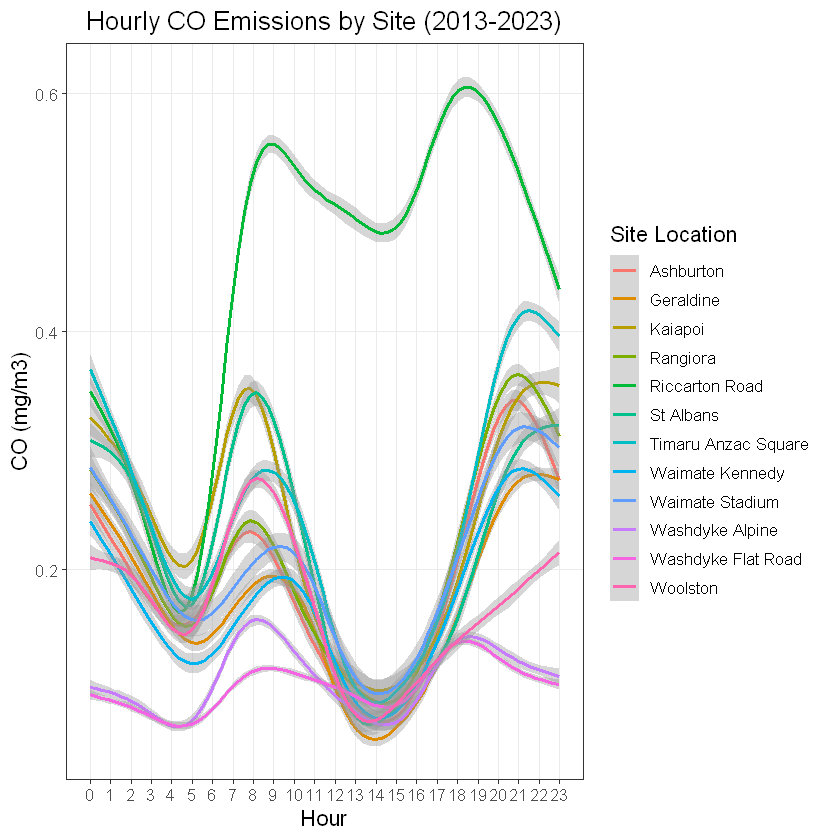

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


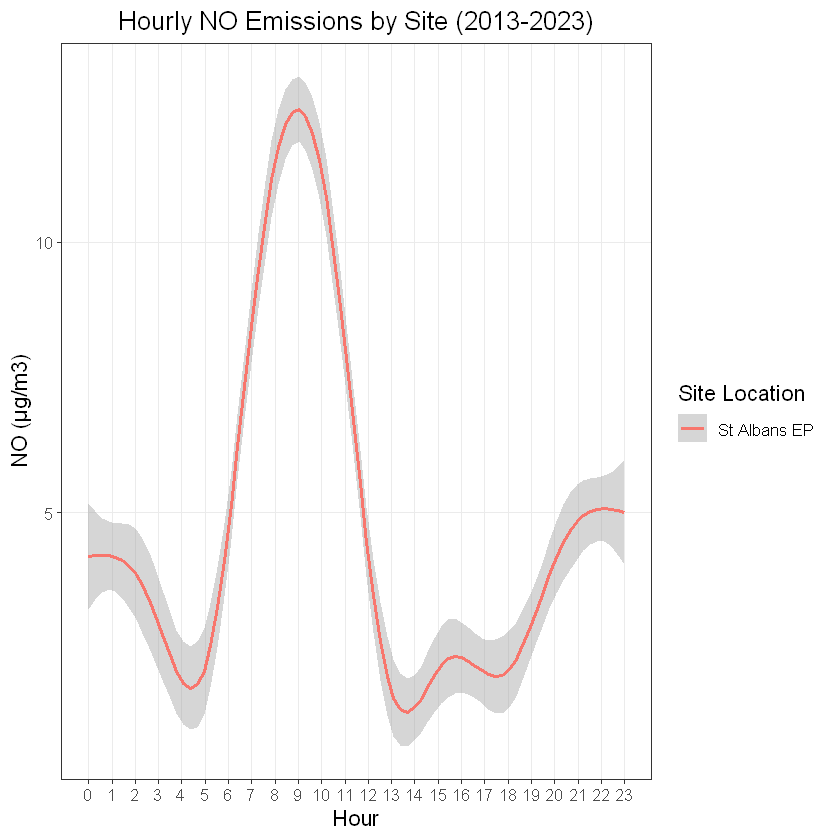

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


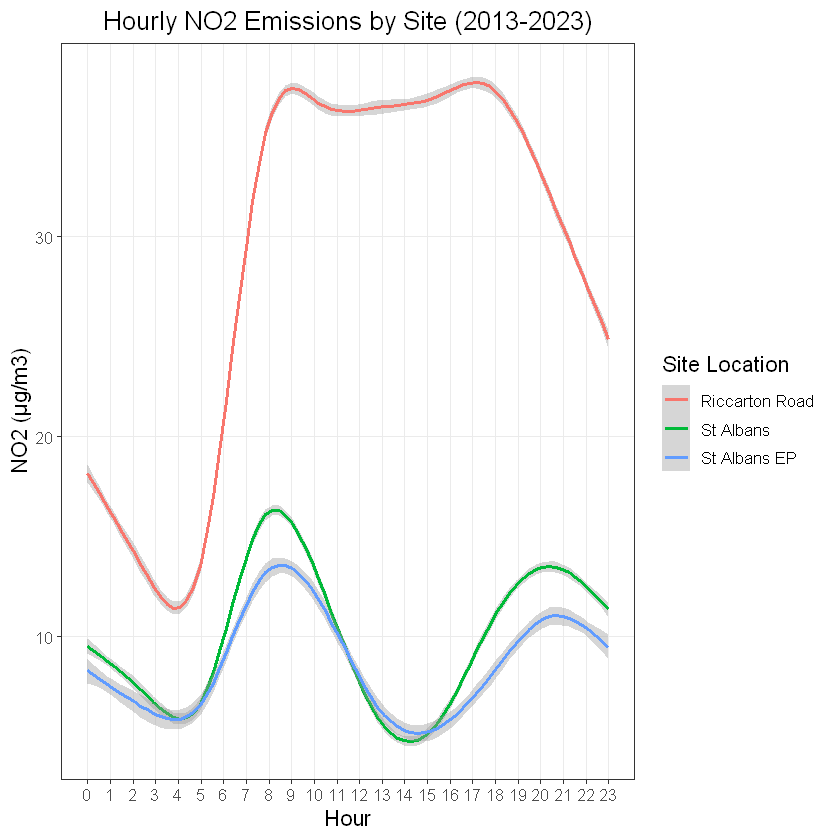

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


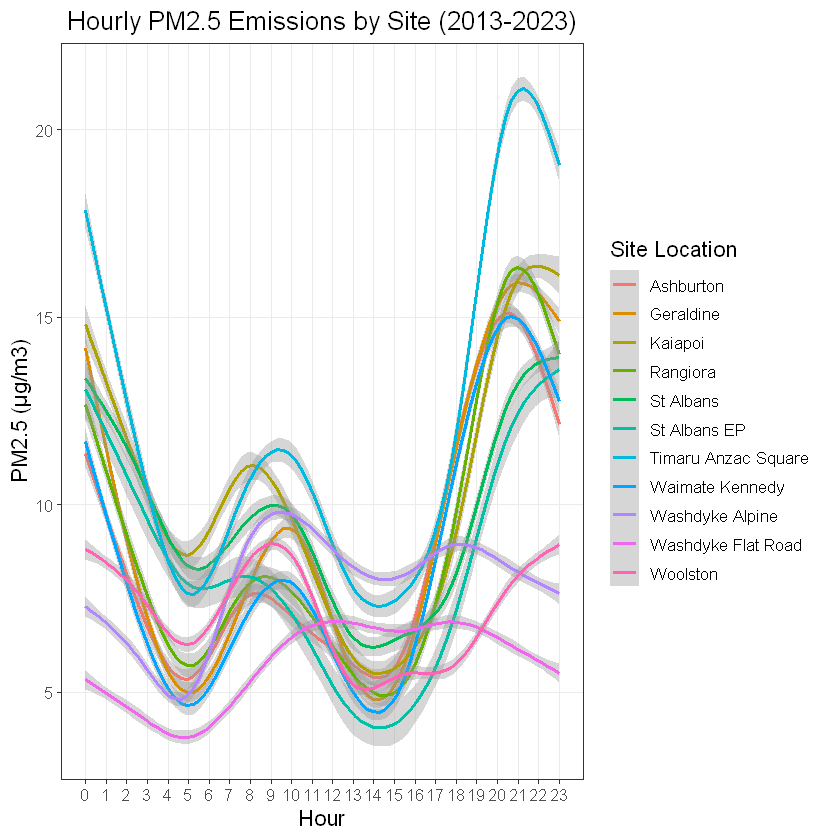

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


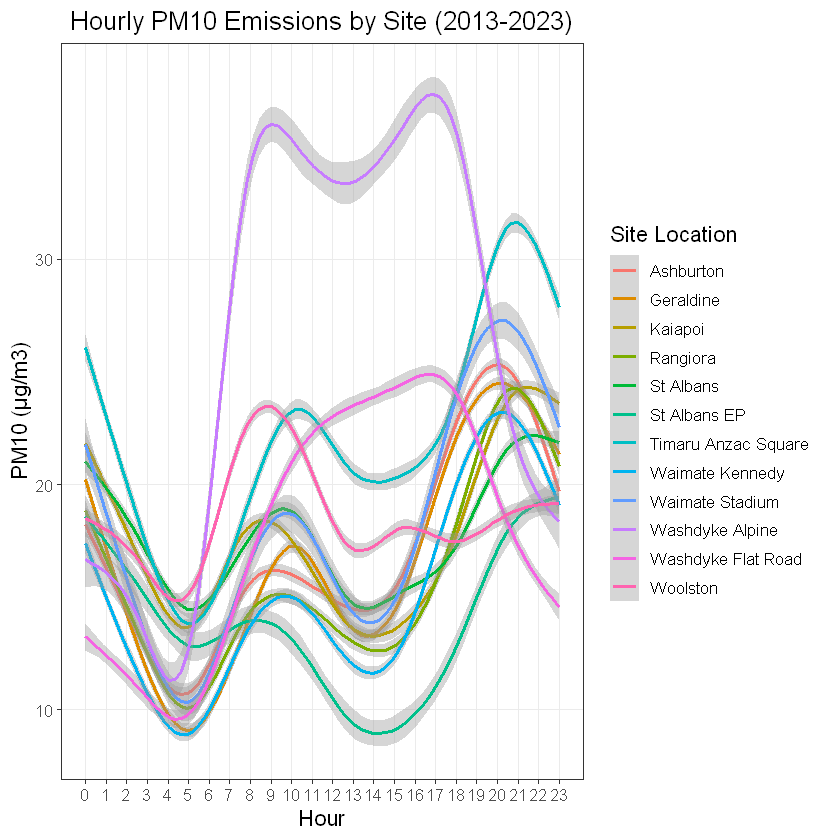

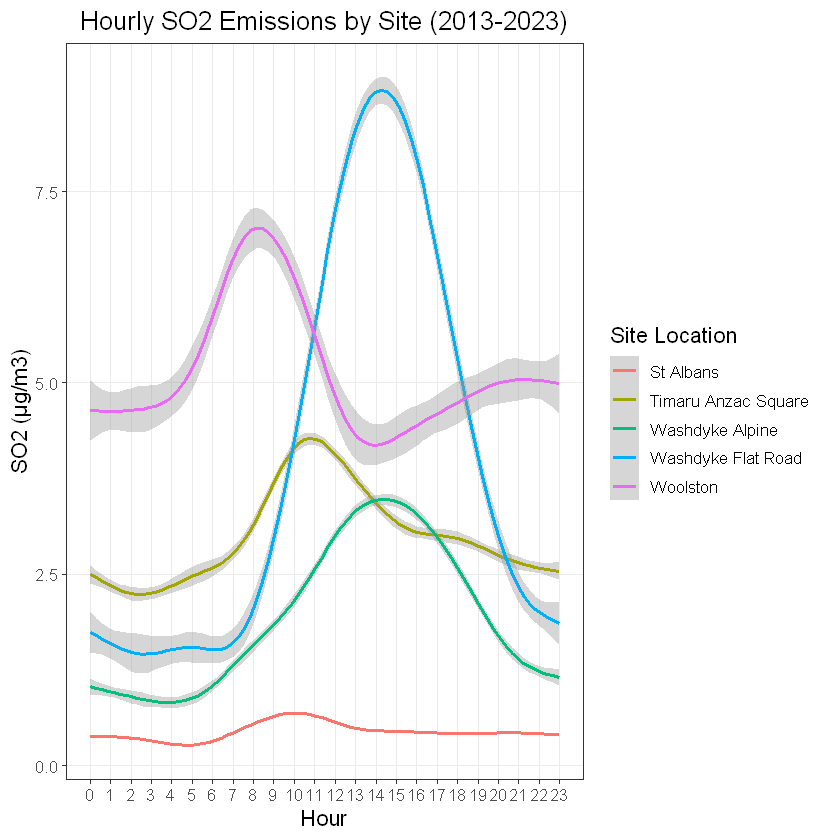

In [12]:
# Plot daily trends for each contaminant by site

for (chemical in contaminants){
    
    # Filter data by a given contaminant
    data_temp = data_full %>% 
                         filter(contaminant == chemical,obs_time != "NA")
    
    # Create ggplot object
    plot_hourly = ggplot(data_temp,
                         aes(x=hour(hms(obs_time)), y=value, color=site_name)) +

        # Create a GAM smoothed curve across time
        geom_smooth(method="gam") + 
        
        # Formatting
        theme_bw() +
        labs(x="Hour",
             y=sprintf("%s (%s)",chemical,unit_dict[chemical]),
             title=sprintf("Hourly %s Emissions by Site (2013-2023)",chemical),
             color="Site Location") +
        scale_x_continuous(breaks=seq(0,23,by=1)) + 
        theme(panel.grid.minor = element_blank(),
              text = element_text(size = 13),
              plot.title = element_text(hjust = 0.5))
    
    # save plot to "plots\\" folder
    save_plot_hourly = paste(plot_folder,"hourly_",chemical,"_",Sys.Date(),".png",sep="")
    ggsave(save_plot_hourly, plot=plot_hourly, width=1000, height=600, scale=3, units = "px")

    # print plots
    #print(plot_hourly)
}

In [ ]:
**Plots #2:** create plots showing daily trends by weekday, by contaminant

In [14]:
# Plot daily trends by day of the week, by contaminant
# (doing this site-wise would be excessive (13*6 plots))

for (chemical in contaminants){

    # Filter data by a given contaminant
    data_temp = data_full %>% filter(contaminant == chemical,weekday != "NA")

    # Create ggplot object
    plot_weekdays = ggplot(data_temp,
         aes(x=hour(hms(obs_time)), y=value, color=weekday)) +

        # Create a GAM smoothed curve across time
        geom_smooth(method="gam") + 
        
        # Formatting
        theme_bw() +
        labs(x="Hour",
             y=sprintf("%s (%s)",chemical,unit_dict[chemical]),
             title=sprintf("Hourly %s Emissions by Weekday (2013-2023)",chemical),
             color="Day") +
        scale_x_continuous(breaks=seq(0,23,by=1)) + 
        theme(panel.grid.minor = element_blank(),
              text = element_text(size = 13),
              plot.title = element_text(hjust = 0.5))
    
    # save plot to "plots\" folder
    save_plot_weekdays = paste(plot_folder,"weekdays_",chemical,"_",Sys.Date(),".png",sep="")
    ggsave(save_plot_weekdays, plot=plot_weekdays, width=1000, height=600, scale=3, units = "px")
    
    #print(plot_weekdays)

}
  

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


**Plots #3:** create plots showing trends across time for all sites

In [13]:
# Plot trends across time for each contaminant.

for (chemical in contaminants){

    # Filter data by a given contaminant
    data_temp = data_summary %>% filter(contaminant == chemical)

    # Create ggplot object
    plot_time = ggplot(data_temp,aes(x=as.Date(obs_date),y=value_mean)) +

        # Create a GAM smoothed curve across time
        geom_smooth(method="gam") + 

        # Create a straight trendline using linear regression
        geom_smooth(method="lm",linetype="dashed",
                    color="black",se=FALSE) +

        # Add a vertical line for the start of the COVID-19 lockdown
        geom_vline(xintercept=as.Date("2020-03-25"),
                   linetype="dotdash",
                   color="orange",size=1) +
        
        # Formatting
        theme_bw() +
        labs(x="Date",
             y=sprintf("%s (%s)",chemical,unit_dict[chemical]),
             title=sprintf("Mean %s Emissions (2013-2023)",chemical)) +
        scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
        theme(panel.grid.minor = element_blank(),
              text = element_text(size = 13),
              plot.title = element_text(hjust = 0.5))

    # Save the plot to the "plots\\" folder
    save_plot_time = paste(plot_folder,"time_",chemical,"_",Sys.Date(),".png",sep="")
    ggsave(save_plot_time, plot=plot_time, width=800, height=600, scale=3, units = "px")

    # Print plots
    #print(plot_time)
}

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 12 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 12 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 1 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 3 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 3 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 11 rows containing non-fi